# Determine relation between NO3 and PO4 in the CAA

Use stations measured in the CAA and Canada Basin to find Redfield ratio for ratio of NO3 to PO4, so that the biological cycle of Mn can be calculated using phosphate. 

Use stations from leg 2 and leb 3b: 
'K1', 'LS2', 'BB2','BB3', 'CAA1','CAA2','CAA3','CAA4','CAA5','CAA6','CAA7','AN312','AN314','AN323','AN324', 'CB1','CB2','AN-407','CAA8','CAA9'

In [2]:
import math
import mpl_toolkits.basemap as basemap
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def polar_stere(lon_w, lon_e, lat_s, lat_n, **kwargs):
    '''Returns a Basemap object (NPS/SPS) focused in a region.

    lon_w, lon_e, lat_s, lat_n -- Graphic limits in geographical coordinates.
                                  W and S directions are negative.
    **kwargs -- Aditional arguments for Basemap object.

    '''
    lon_0 = lon_w + (lon_e - lon_w) / 2.
    ref = lat_s if abs(lat_s) > abs(lat_n) else lat_n
    lat_0 = math.copysign(90., ref)
    proj = 'npstere' if lat_0 > 0 else 'spstere'
    prj = basemap.Basemap(projection=proj, lon_0=lon_0, lat_0=lat_0,
                          boundinglat=0, resolution='c')
    lons = [lon_w, lon_e, lon_w, lon_e, lon_0, lon_0]
    lats = [lat_s, lat_s, lat_n, lat_n, lat_s, lat_n]
    x, y = prj(lons, lats)
    ll_lon, ll_lat = prj(min(x), min(y), inverse=True)
    ur_lon, ur_lat = prj(max(x), max(y), inverse=True)
    return basemap.Basemap(projection='stere', lat_0=lat_0, lon_0=lon_0,
                           llcrnrlon=ll_lon, llcrnrlat=ll_lat,
                           urcrnrlon=ur_lon, urcrnrlat=ur_lat, **kwargs)

def draw_latlon_polygon(bmap, lons, lats, *args, **kwargs):
    '''Plot a polygon in lat/lon coordinates.

    bmap -- Basemap object.
    lons, lats -- Sequences of polygon vertices.
    *args, **kwargs -- Aditional arguments to pyplot.plot().

    You should use 'k-' in *args to draw the lines in color black.

    '''
    if len(lons) != len(lats):
        raise IndexError('lons and lats have different lenghts')
    if lons[-1] != lons[0] or lats[-1] != lats[0]:
        lons = np.concatenate((lons, lons[:1]))
        lats = np.concatenate((lats, lats[:1]))
    n = len(lons) - 1
    res = 10000
    for i in range(n):
        x = np.linspace(lons[i], lons[i + 1], res)
        y = np.linspace(lats[i], lats[i + 1], res)
        x, y = bmap(x, y)
        bmap.plot(x, y, *args, **kwargs)

### Station locations:

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


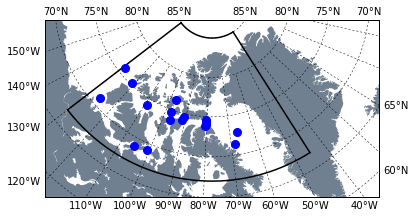

In [3]:
nps = polar_stere(-135, -20, 65, 85, resolution='l')
nps.drawmapboundary(fill_color='white')
nps.fillcontinents(color='slategray', lake_color='white')
mer = np.arange(-150, 120, 10.)
par = np.arange(0, 90, 5.)
nps.drawparallels(par, linewidth=0.5, labels=[False, True, True, False])#, dashes=[1, 5])
nps.drawmeridians(mer, linewidth=0.5, labels=[True, False, False, True])#, dashes=[1, 5])
draw_latlon_polygon(nps, [-130, -130, -45, -45], [67, 85, 85, 67], 'k-')

#coordinates for stations:
# order - K1, LS2, BB1, BB2, BB3, CAA1, CAA2, AN323, AN324, CAA3, CAA4, CAA5, CAA6, CAA7, AN312, AN314
labels = ['K1', 'LS2', 'BB2','BB3', 'CAA1','CAA2','CAA3','CAA4','CAA5','CAA6','CAA7',\
          'AN312','AN314','AN323','AN324','CB1','CB2','AN-407','CAA8','CAA9']
lat_sta = [56.122, 60.454, 72.7495, 71.4091, 74.5214, 74.3209, 73.8155,74.5388, 74.1210,74.7596,73.6729 \
           ,69.1649, 68.9689, 74.1580, 73.9815, 75.212, 75.808, 71.0055, 74.1391, 76.3326] # degrees North
lon_sta = [-53.374, -56.550, -66.9867, -68.5960, -80.5621, -80.4957, -80.4875, -90.8045, -91.5118, -97.4522, -96.5238 \
          , -100.6967, -105.4616, -80.4721, -80.4654, -121, -129, -126, -109, -97] # degrees East

x, y = nps(lon_sta, lat_sta)
nps.plot(x, y, 'bo', markersize=8)

### Load data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy import stats

file_2 = 'Leg2_NO3_PO4.csv' 
file_3b = 'Leg3b_NO3_PO4.csv'

In [5]:
def read_csv(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    CB_data = csv.reader(ifile)
    
    depth = []
    NO3 = []
    PO4 = []
    
    i = 0
    for row in CB_data:
        i += 1
        if i < 2:
            i == 1
        else:
            try:
                depth.append(float(row[3]))
                NO3.append(float(row[4]))
                PO4.append(float(row[5]))
            except ValueError:
                print('on row', i, 'with line', row)
    return depth, NO3, PO4

d_2, NO3_2, PO4_2 = read_csv(file_2)
d_3b, NO3_3b, PO4_3b = read_csv(file_3b)

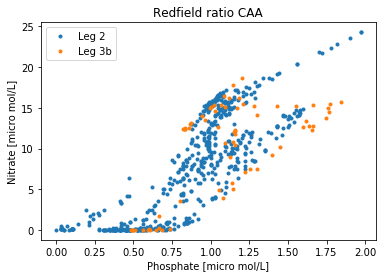

In [6]:
# plot Nitrate vs. Phosphate:
plt.plot(PO4_2, NO3_2, '.', label='Leg 2')
plt.plot(PO4_3b, NO3_3b, '.', label='Leg 3b')
plt.xlabel('Phosphate [micro mol/L]')
plt.ylabel('Nitrate [micro mol/L]')
plt.title('Redfield ratio CAA')
plt.legend()

In [7]:
# Linear regression:
# Leg 2:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(PO4_2, NO3_2)

# Leg 3b:
slope3b, intercept3b, r_value3b, p_value3b, std_err3b = stats.linregress(PO4_3b, NO3_3b)

# Combined:
PO4 = PO4_2 + PO4_3b
NO3 = NO3_2 + NO3_3b
slope, intercept, r_value, p_value, std_err = stats.linregress(PO4,NO3)

#### Calculated redfield ratios, R-squared, and standard error 

In [24]:
print('Slope for both legs combined:', slope, 'and intercept', intercept)
print('R-squared',r_value**2,', standard error', std_err)
print('Slope for Leg 2:', slope2)
print('R-squared',r_value2**2,', standard error', std_err2)
print('Slope for Leg 3b:', slope3b)
print('R-squared',r_value3b**2,', standard error', std_err3b)

Slope for both legs combined: 13.8192601822 and intercept -4.22339628854
R-squared 0.653566310647 , standard error 0.402770569807
Slope for Leg 2: 14.3881189207
R-squared 0.679438764337 , standard error 0.419884146591
Slope for Leg 3b: 10.470920533
R-squared 0.423538511164 , standard error 1.48138896071


In [9]:
x = np.linspace(0.25,2,num=20)

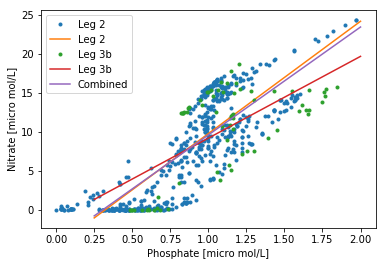

In [10]:
y_2 = x*slope2 + intercept2
y_3b = x*slope3b + intercept3b
y_comb = x*slope + intercept

plt.plot(PO4_2, NO3_2,  '.', label='Leg 2')
plt.plot(x, y_2, '-',label='Leg 2')
plt.plot(PO4_3b, NO3_3b,  '.', label='Leg 3b')
plt.plot(x, y_3b, '-',label='Leg 3b')
plt.plot(x, y_comb, '-',label='Combined')
plt.xlabel('Phosphate [micro mol/L]')
plt.ylabel('Nitrate [micro mol/L]')
plt.legend()

### Identify differences due to depth

In [11]:
#indices of detphs < 100 m  and > 100 m --- Leg 2
deep = []
surf = []
i = -1
for element in d_2:
    i += 1
    if element > 50:
        deep.append(i)
    else:
        surf.append(i)
        
PO4_deep = [PO4_2[i] for i in deep]
PO4_surf = [PO4_2[i] for i in surf]
NO3_deep = [NO3_2[i] for i in deep]
NO3_surf = [NO3_2[i] for i in surf]

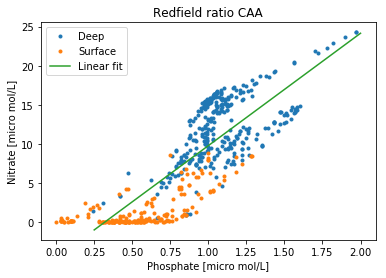

In [12]:
# plot Nitrate vs. Phosphate with surface and deep seperated --- Leg 2:
plt.plot(PO4_deep, NO3_deep, '.', label='Deep')
plt.plot(PO4_surf, NO3_surf, '.', label='Surface')
plt.plot(x, y_2, '-',label='Linear fit')
plt.xlabel('Phosphate [micro mol/L]')
plt.ylabel('Nitrate [micro mol/L]')
plt.title('Redfield ratio CAA')
plt.legend()

In [13]:
# Deep:
s_deep, int_deep, r_deep, p_deep, std_deep = stats.linregress(PO4_deep, NO3_deep)
# Surface:
s_surf, int_surf, r_surf, p_surf, std_surf = stats.linregress(PO4_surf, NO3_surf)

In [26]:
r_deep, r_surf

print('Slope for surface:', s_surf)
print('R-squared',r_surf**2,', standard error', std_surf)
print('Slope for deep:', s_deep)
print('R-squared',r_deep**2,', standard error', std_deep)

Slope for surface: 5.76523345202
R-squared 0.50261927687 , standard error 0.390224853763
Slope for deep: 10.916888156
R-squared 0.375242692661 , standard error 0.76847328189


--> fit is a lot worse when seperating the surface and deep water

In [15]:
s_deep, s_surf

(10.91688815596301, 5.7652334520191522)

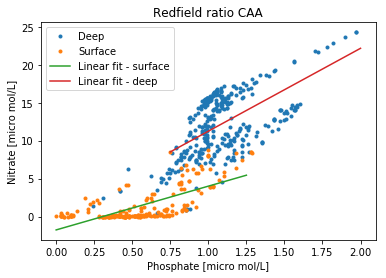

In [16]:
# plot Nitrate vs. Phosphate with surface and deep seperated --- Leg 2:
x_surf = np.linspace(0,1.25,num=20)
x_deep = np.linspace(0.75,2,num=20)
y_surf = x_surf*s_surf + int_surf
y_deep = x_deep*s_deep + int_deep

plt.plot(PO4_deep, NO3_deep, '.', label='Deep')
plt.plot(PO4_surf, NO3_surf, '.', label='Surface')
plt.plot(x_surf, y_surf, '-',label='Linear fit - surface')
plt.plot(x_deep, y_deep, '-',label='Linear fit - deep')
plt.xlabel('Phosphate [micro mol/L]')
plt.ylabel('Nitrate [micro mol/L]')
plt.title('Redfield ratio CAA')
plt.legend()

In [17]:
((1.045*10**(-3))*4.2234) + 0.0159

0.020313453000000002